# `Proyecto Final Machine Learning`

- Linnethy Julieth Lambraño Pérez
- Diego Armando Corredor Rivera

#  Nivel de obesidad

En el siguiente enlace encontrarán una base de datos que permiten estimarlos niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, además, hay una variable `NObesidad` (Nivel de obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Nivel de Sobrepeso I, Nivel de Sobrepeso II, Obesidad Tipo I , Obesidad tipo II y Obesidad tipo III. El 77% de los datos se generaron sintéticamente utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recopilaron directamente de los usuarios a través de una plataforma web, la información acerca de los datos y los paper relevantes que se han creado a partir de este ejercicio lo pueden encontrar en:

[ Estimation of obesity levels based on eating habits and physical condition Data Set ](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)

### `0.Librerías`

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### `1.Lectura de base`

In [5]:

Datos_Ob =pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')

#Datos_Ob.info()
X = Datos_Ob


In [6]:
Numerica = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
X_Numerica = X[Numerica]
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


Se presenta el resumen de las variables, en donde se destaca que la edad promedio de los encuestados es de 24 años, peso promedio de 86kg y 170 cm de altura.

### `2.Matriz de correlación`

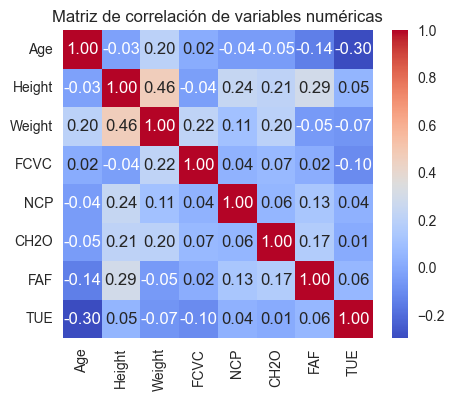

In [50]:

correlation_matrix = X_Numerica.corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables numéricas')
plt.show()

En la anterior gráfica se presenta la matriz de correlación, en donde se pueden observar que la correlación más alta positivamente es la de peso con altura, siendo esta del 0.46. Por el contrario la edad con el tiempo dedicado a manipular dispositivos tecnológicos presenta una correlación negativa del 0.3.

### `3.Análisis descriptivo`

In [11]:
def count_values(dataset, cat_variable, order = None):
    """
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Oranges_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "Black", size = 10)
    
    plt.title(f"Conte de personas por {cat_variable}")
    plt.show()
    

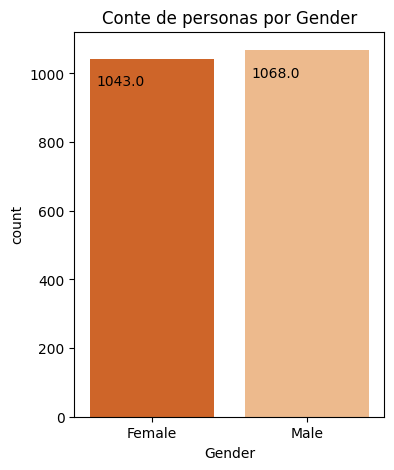

In [16]:
plt.figure(figsize = (4, 5))
count_values(X, "Gender")

La proporción de personas por género que respondieron la encuesta es similar en hombres y mujeres

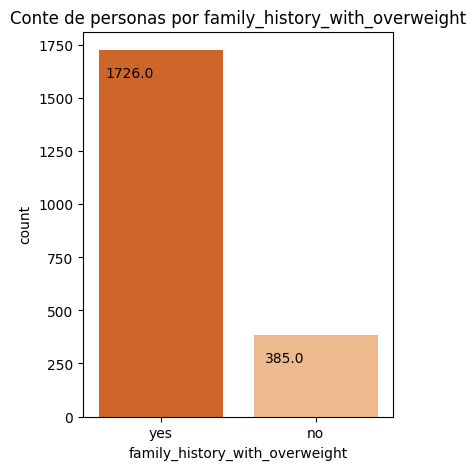

In [17]:
plt.figure(figsize = (4, 5))
count_values(X, "family_history_with_overweight")

El 82% de las personas encuestadas respondieron que tienen antecedentes de sobrepeso en familiares.

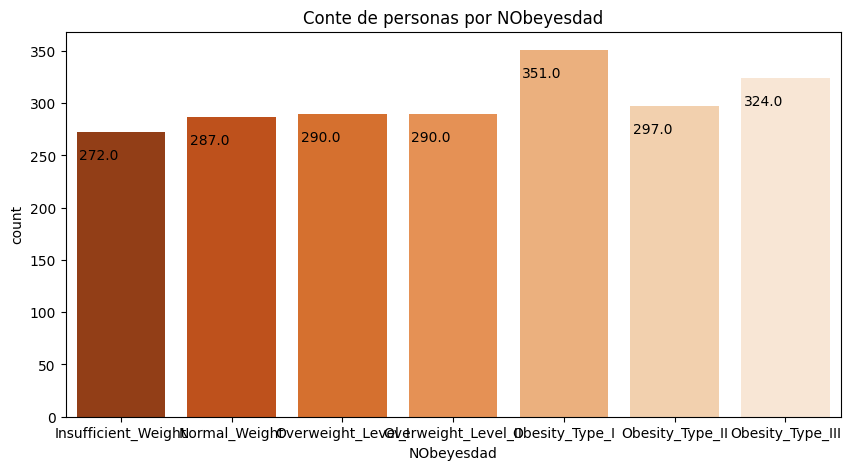

In [20]:
plt.figure(figsize = (10, 5))
count_values(X, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

El nivel de sobrepeso que más predomina en los encuestados corresponde al tipo 1 de obesidad con una participación del 16%, seguido de obesidad tipo 3 y tipo  2 con un 15% y 14% respectivamente. 

In [21]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional)
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Reds_r")
    
    plt.show()

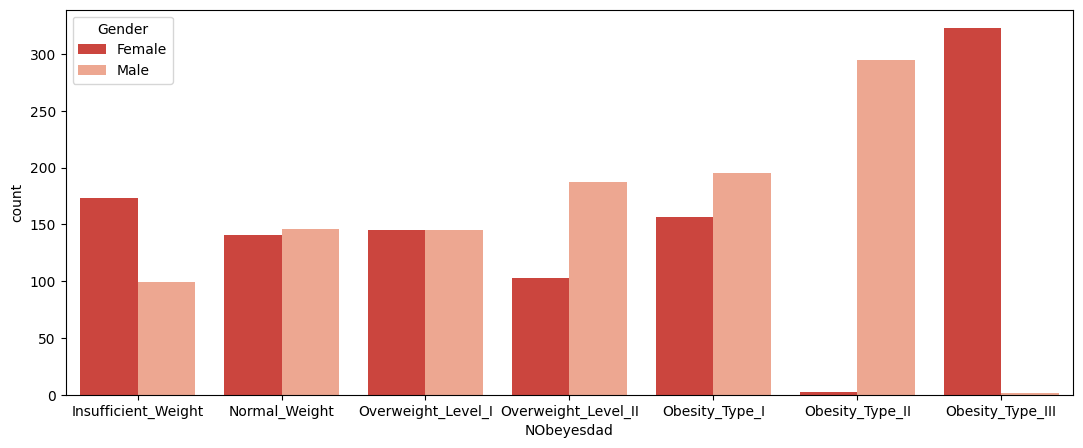

In [26]:
plt.figure(figsize = (13, 5))
cross_plot(X, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

La obesidad tipo 3 se caracteriza por predominar el género femenino, mientras que en la obesidad tipo 2 predomina el género masculino.

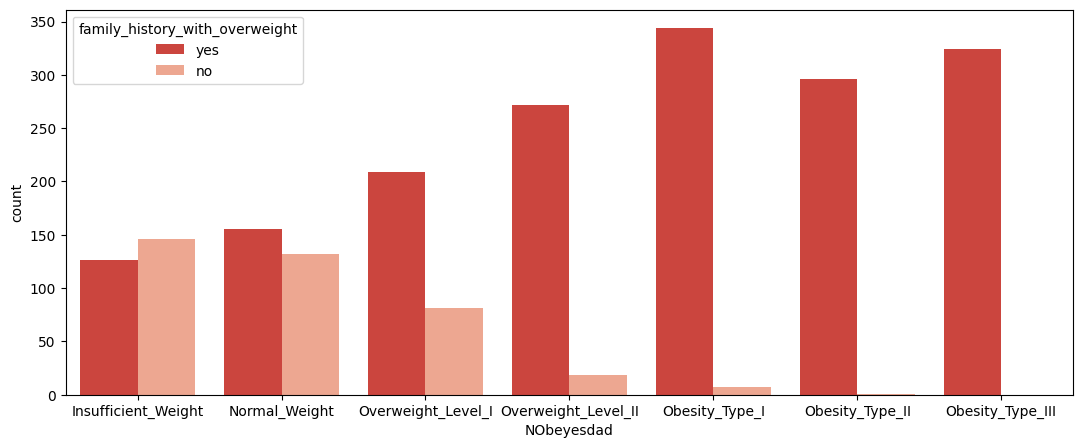

In [27]:
plt.figure(figsize = (13, 5))
cross_plot(X, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

Cuando se presenta niveles de sobrepeso en los encuestados, la mayoría han tenido familiares con antecendentes de sobrepeso.

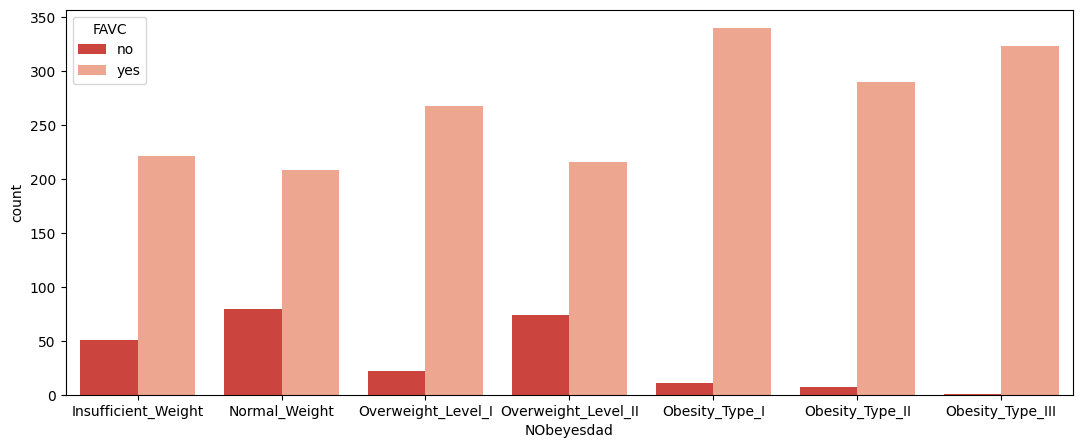

In [28]:
plt.figure(figsize = (13, 5))
cross_plot(X, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Desde los nivles mpas bajos de peso hasta los más altos, se evidencian que consumen alimentos ricos en calorías con frecuencia.

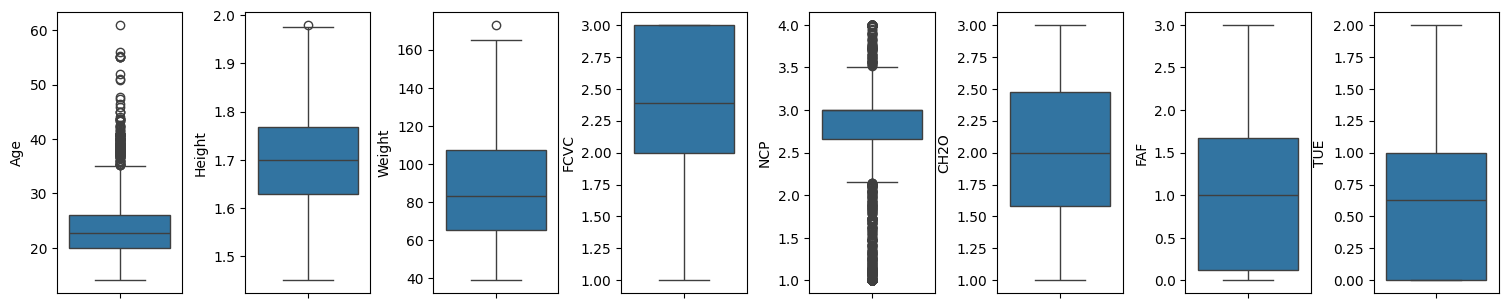

In [32]:
fig, axs = plt.subplots(ncols = 8, nrows = 1, figsize = (15, 3))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in X_Numerica.items():
    sns.boxplot(y = k, data = X_Numerica, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

La edad presenta valores atípicos, así como la variable de cuantas comidas principales hace al día. Dado que hay variables que no están en los rangos correctos, se procede a redondear los valores.

In [33]:
X['Age'] = round(X['Age'],0)
X['FCVC'] = round(X['FCVC'],0)
X['NCP'] = round(X['NCP'],0)
X['CH2O'] = round(X['CH2O'],0)
X['FAF'] = round(X['FAF'],0)
X['TUE'] = round(X['TUE'],0)

In [34]:
from sklearn.model_selection import train_test_split

Numerica = ["Age","FCVC","NCP","CH2O","FAF","TUE"]
Categorica = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales = ["CAEC", "CALC"]

X_Numerica = X[Numerica]
X_Categorica = X[Categorica]
X_Ordinal = X[Ordinales]

A continuación se realiza el preprocesamiento y transformación de las variables categóricas, numéricas y ordinales.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,  OneHotEncoder
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


Categorica_trans = OneHotEncoder(handle_unknown='ignore')
Numerical_trans = StandardScaler()
Ordinal_trans = OrdinalEncoder()


Preprocesamiento = ColumnTransformer(
    transformers=[
        ('Categorica', Categorica_trans, Categorica),
        ('Numerica', Numerical_trans, Numerica),
        ('Oridnal', Ordinal_trans, Ordinales)
    ])


In [115]:
Preprocesamiento.fit_transform(X)


array([[ 1.        ,  0.        ,  0.        , ...,  0.49771704,
         2.        ,  3.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.98629521,
         2.        ,  2.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.49771704,
         2.        ,  1.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.49771704,
         2.        ,  2.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.49771704,
         2.        ,  2.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.49771704,
         2.        ,  2.        ]])

### `4.Reducción de dimensionalidad y clúster`

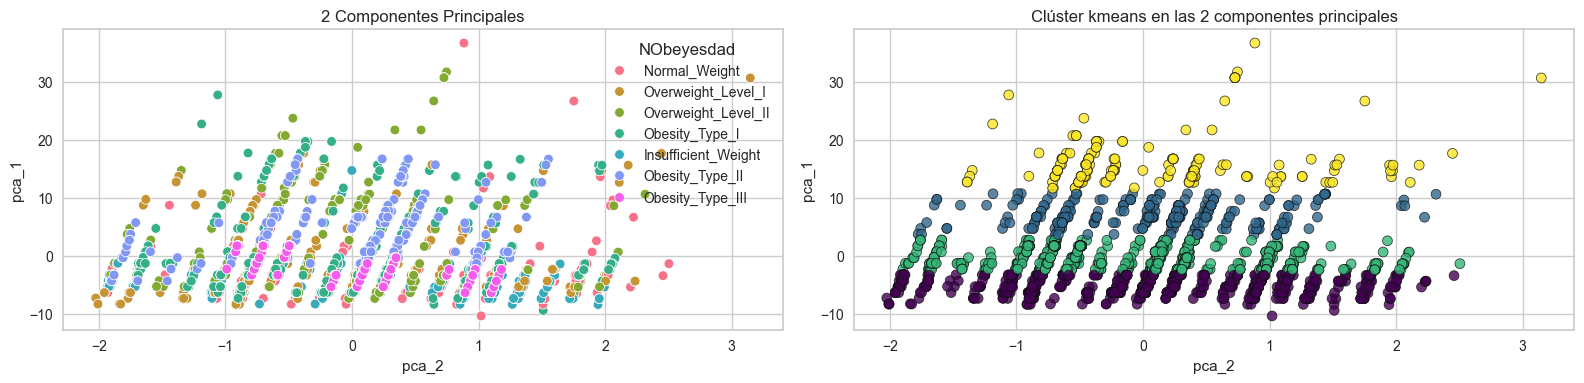

In [71]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#PCA
pca = PCA(n_components=2)
pca_top_2 = pca.fit_transform(X[Numerica])
pca_top_2

tmp = pd.DataFrame(data = pca_top_2, columns = ['pca_1','pca_2'])
tmp['NObeyesdad'] = X["NObeyesdad"]

fig,axs = plt.subplots(1,2,figsize = (16,4))
sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='NObeyesdad',ax=axs[0])
axs[0].set_title("2 Componentes Principales")

#KMeans
kmeans = KMeans(4,random_state=17)
kmeans.fit(tmp[['pca_1','pca_2']])
sns.scatterplot( y= tmp['pca_1'],x = tmp['pca_2'],c = kmeans.labels_,cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.8,ax = axs[1])
axs[1].set_title("Clúster kmeans en las 2 componentes principales")
plt.tight_layout()
plt.show()

Se realiza la reducción de dimensionalidad obteniendo como resultado tomar 2 dimensiones en donde se recogerá el 73% de la inercia total, con lo cual se aplica la metodología de clúster Kmeans teniendo en cuenta el comportamiento de los datos.

In [72]:
pca.singular_values_

array([292.20451555,  42.34740255])

In [73]:
pca.singular_values_.sum()

334.5519180961429

In [74]:
## cantidad de inercia que se recoge en la primer componente
292.204/457.832

0.6382341120760454

In [75]:
## ## cantidad de inercia que se recoge en la segunda componente
42.347/457.832

0.09249462685002359

A continuación se presenta el resumen de los componentes componentes principales 

In [76]:
pca = PCA(n_components=2)
pca.fit(X_Numerica)
PCA_ds = pd.DataFrame(pca.transform(X_Numerica), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2111.0,-1.400217e-15,6.361297,-10.342433,-4.329202,-1.346492,1.718413,36.647820
col2,2111.0,1.346362e-17,0.921904,-2.023741,-0.691645,0.027027,0.713745,3.146498


### `4.1. Selección de la cantidad de clúster óptimos`

Elbow Method determina el numero de clúster:


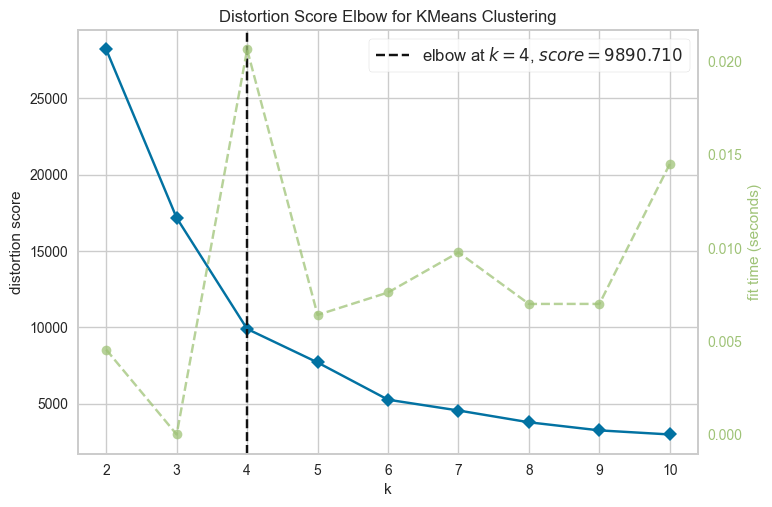

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method determina el numero de clúster:')
Elbow_M = KElbowVisualizer(KMeans(random_state=17), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

En la anterior gráfica se puede observar que se seleccionan 4 clúster como el número óptimo a tomar.

### `4.2. Distribución de los clúster`

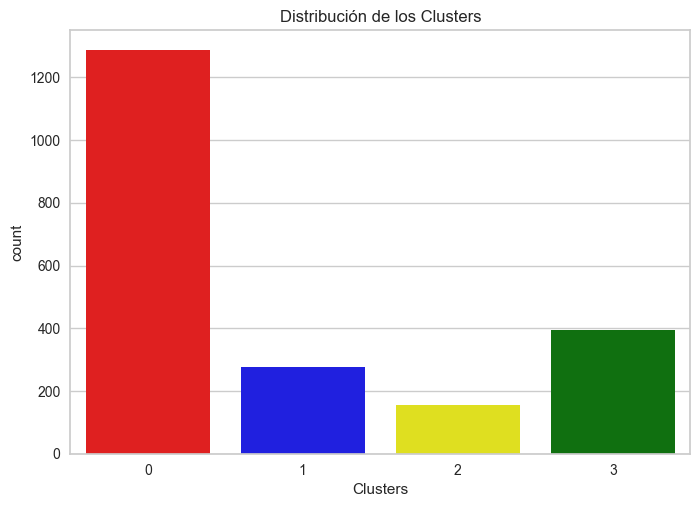

In [79]:
from sklearn.cluster import AgglomerativeClustering


Aglomer_Cluster = AgglomerativeClustering(n_clusters=4)

yhat_ACluster = Aglomer_Cluster.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_ACluster

X["Clusters"]= yhat_ACluster

Color = ["red","blue", "yellow","green"]
pl = sns.countplot(x=X["Clusters"], palette= Color)
pl.set_title("Distribución de los Clusters")
plt.show()

<Figure size 800x550 with 0 Axes>

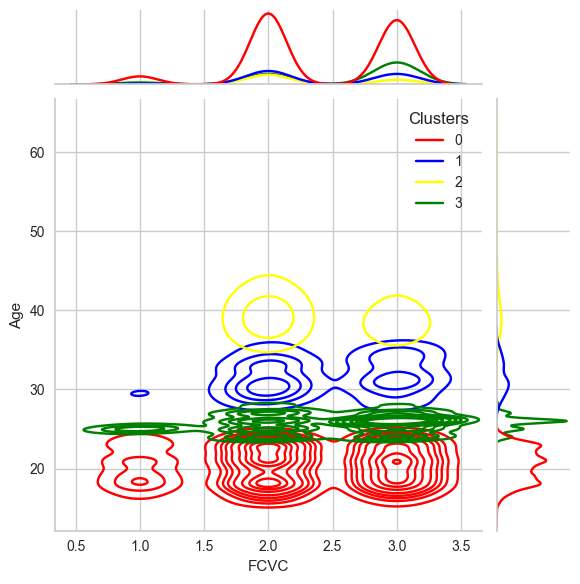

<Figure size 500x400 with 0 Axes>

<Figure size 800x550 with 0 Axes>

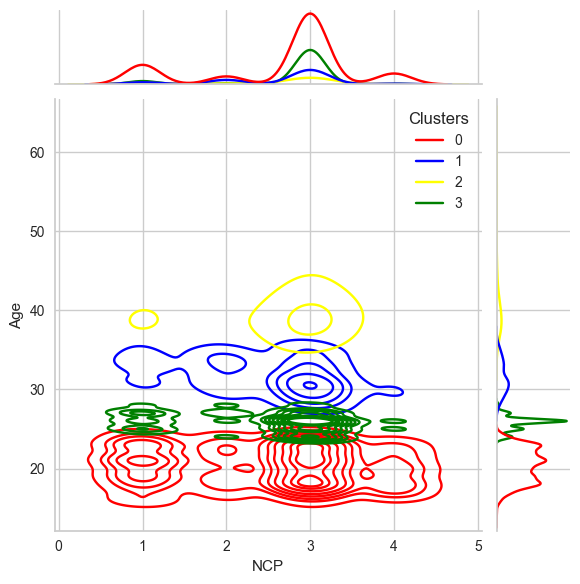

<Figure size 500x400 with 0 Axes>

<Figure size 800x550 with 0 Axes>

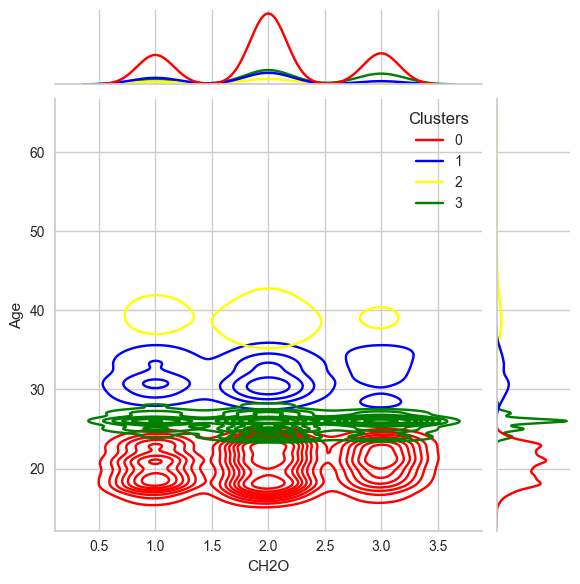

<Figure size 500x400 with 0 Axes>

<Figure size 800x550 with 0 Axes>

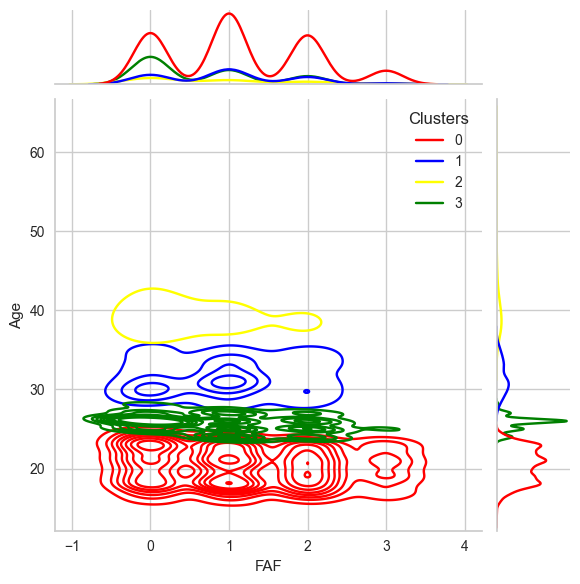

<Figure size 500x400 with 0 Axes>

<Figure size 800x550 with 0 Axes>

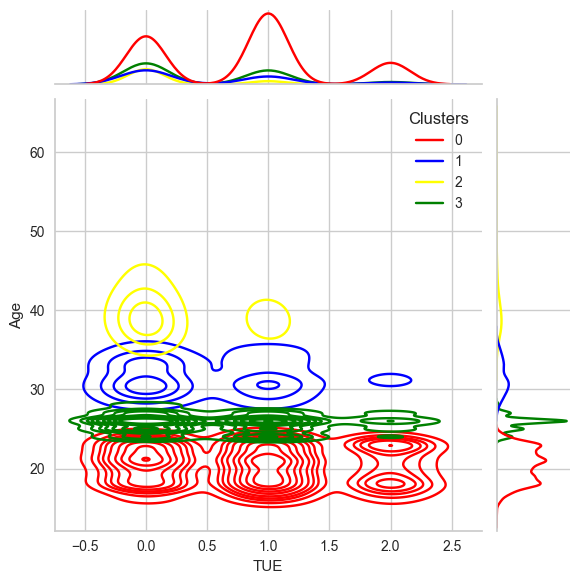

<Figure size 500x400 with 0 Axes>

In [86]:
variables = ["FCVC","NCP","CH2O","FAF","TUE"]

for i in variables:
    plt.figure()
    sns.jointplot(x=X_Numerica[i], y=X_Numerica["Age"], hue =X_Numerica["Clusters"], kind="kde", palette=Color)
    plt.show()
    plt.figure(figsize=(5,4))